In [12]:
#Carga de librerias
import glob
import pandas
import networkx
import numpy
import gc
import matplotlib.pyplot as plt
import folium
from folium import plugins
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
#pyproj.pyproj_datadir = "/usr/share/proj/"
#from mpl_toolkits.basemap import Basemap as Basemap
def SufijoColumna(Data,suf):
    i=Data
    final=[]
    for c in i:
        final.append(c+suf)
    return final
pandas.options.display.float_format = '{:.2f}'.format # Configuramos separadores de miles y 2 decimales
#Carga de Datos

a=glob.glob("../../Datos/Agregacion/EstadisticasRNDC_2019*")
municipios=pandas.read_excel("../../Datos/Agregacion/Municipios_Dane_Ubicados.xlsx", header=0)
municipios_ori=pandas.read_excel("../../Datos/Agregacion/Municipios_Dane_Ubicados.xlsx", header=0)
NameMunicipios=municipios_ori.columns
municipios_ori.columns =SufijoColumna(NameMunicipios,"_Ori")
municipios_dest=pandas.read_excel("../../Datos/Agregacion/Municipios_Dane_Ubicados.xlsx", header=0)
NameMunicipios=municipios_dest.columns
municipios_dest.columns =SufijoColumna(NameMunicipios,"_Dest")
for b in a:
    A1=pandas.read_excel(b, header=0)
    A1["Tiempo"]=str(A1["MES"])
    try:
        A2=A2.append(A1,ignore_index=True,sort=True)
        print(b)
    except:
        A2=A1
        print("NO")
#Marcar posisiones de todos los municipios con el centroide ya determinado        
pos={}
for er in municipios.Id:
    pos[int(er)]=(municipios.Long2.loc[municipios['Id'] == er].values[0],municipios.lat.loc[municipios['Id'] == er].values[0])
A2.info()
municipios.info()

../../Datos/Agregacion/EstadisticasRNDC_201907.xlsx
../../Datos/Agregacion/EstadisticasRNDC_201909.xlsx
../../Datos/Agregacion/EstadisticasRNDC_201903.xlsx
../../Datos/Agregacion/EstadisticasRNDC_201906.xlsx
../../Datos/Agregacion/EstadisticasRNDC_201904.xlsx
../../Datos/Agregacion/EstadisticasRNDC_201910.xlsx
../../Datos/Agregacion/EstadisticasRNDC_201912.xlsx
../../Datos/Agregacion/EstadisticasRNDC_201908.xlsx
../../Datos/Agregacion/EstadisticasRNDC_201902.xlsx
../../Datos/Agregacion/EstadisticasRNDC_201911.xlsx
../../Datos/Agregacion/EstadisticasRNDC_201905.xlsx
../../Datos/Agregacion/EstadisticasRNDC_201901.xlsx
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3085836 entries, 0 to 3085835
Data columns (total 24 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   CODMERCANCIA            object
 1   CODMUNICIPIODESTINO     int64 
 2   CODMUNICIPIOORIGEN      int64 
 3   CODOPERACIONTRANSPORTE  object
 4   CODTIPOCONTENEDOR       object
 5   COD_CO

['EstadisticasRNDC_201907.xlsx',
 'EstadisticasRNDC_201510.xlsx',
 'EstadisticasRNDC_201802.xlsx',
 'Municipios_Dane_Ubicados.xlsx',
 'EstadisticasRNDC_201804.xlsx',
 'EstadisticasRNDC_201909.xlsx',
 'EstadisticasRNDC_201511.xlsx',
 'EstadisticasRNDC_201801.xlsx',
 'EstadisticasRNDC_201807.xlsx',
 'EstadisticasRNDC_201903.xlsx',
 'EstadisticasRNDC_201810.xlsx',
 'EstadisticasRNDC_201507.xlsx',
 'EstadisticasRNDC_201906.xlsx',
 'EstadisticasRNDC_201705.xlsx',
 'EstadisticasRNDC_201612.xlsx',
 'EstadisticasRNDC_201702.xlsx',
 'EstadisticasRNDC_201707.xlsx',
 'EstadisticasRNDC_201803.xlsx',
 'EstadisticasRNDC_201606.xlsx',
 'EstadisticasRNDC_201709.xlsx',
 'EstadisticasRNDC_201509.xlsx',
 'EstadisticasRNDC_201806.xlsx',
 'EstadisticasRNDC_201503.xlsx',
 'EstadisticasRNDC_201601.xlsx',
 'EstadisticasRNDC_201703.xlsx',
 'EstadisticasRNDC_201508.xlsx',
 'EstadisticasRNDC_201604.xlsx',
 'EstadisticasRNDC_201501.xlsx',
 'EstadisticasRNDC_201607.xlsx',
 'EstadisticasRNDC_201712.xlsx',
 'Estadis

In [13]:
A2

,CODMERCANCIA,CODMUNICIPIODESTINO,CODMUNICIPIOORIGEN,CODOPERACIONTRANSPORTE,CODTIPOCONTENEDOR,COD_CONFIG_VEHICULO,CONFIG_VEHICULO,DEPARTAMENTODESTINO,DEPARTAMENTOORIGEN,GALONES,...,MUNICIPIODESTINO,MUNICIPIOORIGEN,NATURALEZACARGA,OPERACIONTRANSPORTE,TIPOCONTENEDOR,Tiempo,VALORESPAGADOS,VIAJESLIQUIDOS,VIAJESTOTALES,VIAJESVALORCERO
0,001601,5400000,5001000,G,.,CA,Camioneta de 2 ejes,ANTIOQUIA,ANTIOQUIA,0,...,LA UNION ANTIOQUIA,MEDELLIN ANTIOQUIA,Carga Normal,General,.,0 201907\n1 201907\n2 ...,1162500,0,3,0
1,009980,25899000,5001000,G,.,CA,Camioneta de 2 ejes,CUNDINAMARCA,ANTIOQUIA,0,...,ZIPAQUIRA CUNDINAMARCA,MEDELLIN ANTIOQUIA,Carga Normal,General,.,0 201907\n1 201907\n2 ...,574500,0,1,0
2,009800,76834000,5001000,G,.,CA,Camioneta de 2 ejes,VALLE DEL CAUCA,ANTIOQUIA,0,...,TULUA VALLE DEL CAUCA,MEDELLIN ANTIOQUIA,Carga Normal,General,.,0 201907\n1 201907\n2 ...,2400000,0,3,0
3,009890,76109000,5001000,G,.,CA,Camioneta de 2 ejes,VALLE DEL CAUCA,ANTIOQUIA,0,...,BUENAVENTURA VALLE DEL CAUCA,MEDELLIN ANTIOQUIA,Carga Normal,General,.,0 201907\n1 201907\n2 ...,1400000,0,1,0
4,002710,5380000,5001000,G,.,CA,Camioneta de 2 ejes,ANTIOQUIA,ANTIOQUIA,0,...,LA ESTRELLA LA ESTRELLA ANTIOQUIA,MEDELLIN ANTIOQUIA,Carga Normal,General,.,0 201907\n1 201907\n2 ...,80000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3085831,002202,20001000,8001000,G,.,4R4,Camión Rígido de 4 ejes Remolque de 4 ejes,CESAR,ATLANTICO,0,...,VALLEDUPAR CESAR,BARRANQUILLA ATLANTICO,Carga Normal,General,.,0 201901\n1 201901\n2 ...,4400000,0,3,0
3085832,002202,23001000,8001000,G,.,4R4,Camión Rígido de 4 ejes Remolque de 4 ejes,CORDOBA,ATLANTICO,0,...,MONTERIA CORDOBA,BARRANQUILLA ATLANTICO,Carga Normal,General,.,0 201901\n1 201901\n2 ...,2200000,0,1,0
3085833,002202,70771013,8001000,G,.,4R4,Camión Rígido de 4 ejes Remolque de 4 ejes,SUCRE,ATLANTICO,0,...,MONTERIA SUCRE SUCRE,BARRANQUILLA ATLANTICO,Carga Normal,General,.,0 201901\n1 201901\n2 ...,1500000,0,1,0
3085834,007010,8001000,20001000,G,.,4R4,Camión Rígido de 4 ejes Remolque de 4 ejes,ATLANTICO,CESAR,0,...,BARRANQUILLA ATLANTICO,VALLEDUPAR CESAR,Carga Normal,General,.,0 201901\n1 201901\n2 ...,3200000,0,3,0


In [14]:
A2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3085836 entries, 0 to 3085835
Data columns (total 24 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   CODMERCANCIA            object
 1   CODMUNICIPIODESTINO     int64 
 2   CODMUNICIPIOORIGEN      int64 
 3   CODOPERACIONTRANSPORTE  object
 4   CODTIPOCONTENEDOR       object
 5   COD_CONFIG_VEHICULO     object
 6   CONFIG_VEHICULO         object
 7   DEPARTAMENTODESTINO     object
 8   DEPARTAMENTOORIGEN      object
 9   GALONES                 int64 
 10  KILOGRAMOS              int64 
 11  KILOMETROS              int64 
 12  MERCANCIA               object
 13  MES                     int64 
 14  MUNICIPIODESTINO        object
 15  MUNICIPIOORIGEN         object
 16  NATURALEZACARGA         object
 17  OPERACIONTRANSPORTE     object
 18  TIPOCONTENEDOR          object
 19  Tiempo                  object
 20  VALORESPAGADOS          int64 
 21  VIAJESLIQUIDOS          int64 
 22  VIAJESTOTALES     

In [15]:
#Cambios en la base de datos
def CodigoDane(Completo):
    Completo=str(Completo)
    Tam=len(Completo)
    if Tam<6:
        Cortado=99999
    else:
        Cortado=int(Completo[:Tam-3])       
    return Cortado
def BuscadorGuacari(num):
    if num==76318:
        Temp=1
    else:
        return 0
    return Temp
def TemporizadorAge(Texto):
    Salida=str(Texto)[:4]
    return Salida
def TemporizadorMes(Texto):
    Salida=str(Texto)[4:]
    return Salida
def ConvInteger(temp):
    try:
        final=int(temp)
    except:
        final=0
    return final


A2["CODMUNICIPIOORIGEN2"]=A2["CODMUNICIPIOORIGEN"].apply(CodigoDane)
A2["CODMUNICIPIODESTINO2" ]=A2["CODMUNICIPIODESTINO" ].apply(CodigoDane)
A3=pandas.merge(A2, municipios_ori, left_on='CODMUNICIPIOORIGEN2', right_on='Id_Ori',how="left")
A4=pandas.merge(A3, municipios_dest, left_on='CODMUNICIPIODESTINO2', right_on='Id_Dest',how="left")
A4["Recorrido"]=A4["NOMBRE_DPT_Ori"]+"/"+A4["label_Ori"]+"_"+A4["NOMBRE_DPT_Dest"]+"/"+A4["label_Dest"]
A4["Age"]=A4["MES"].apply(TemporizadorAge)
A4["MesF"]=A4["MES"].apply(TemporizadorMes)
A4["Id_Ori2"]=A4["Id_Ori"].apply(ConvInteger)
A4["Id_Dest2"]=A4["Id_Dest"].apply(ConvInteger)
A4["Guacari_origen"]=A4["Id_Ori2"].apply(BuscadorGuacari)
A4["Guacari_destino"]=A4["Id_Dest2"].apply(BuscadorGuacari)
A4["DateComplete"]=A4["Age"]+"/"+A4["MesF"] +"/"+"01"
A4['DateComplete'] = pandas.to_datetime(A4['DateComplete'], format='%Y/%m/%d')

In [16]:
#Filtrado de informacion
A4=A4[["CODMERCANCIA","MERCANCIA","KILOGRAMOS","GALONES","MUNICIPIOORIGEN","Guacari_origen",'DateComplete',"DEPARTAMENTODESTINO"]]

In [17]:
A4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3086390 entries, 0 to 3086389
Data columns (total 8 columns):
 #   Column               Dtype         
---  ------               -----         
 0   CODMERCANCIA         object        
 1   MERCANCIA            object        
 2   KILOGRAMOS           int64         
 3   GALONES              int64         
 4   MUNICIPIOORIGEN      object        
 5   Guacari_origen       int64         
 6   DateComplete         datetime64[ns]
 7   DEPARTAMENTODESTINO  object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 211.9+ MB


In [18]:
numpy.sort(A4['DateComplete'].unique())

array(['2019-01-01T00:00:00.000000000', '2019-02-01T00:00:00.000000000',
       '2019-03-01T00:00:00.000000000', '2019-04-01T00:00:00.000000000',
       '2019-05-01T00:00:00.000000000', '2019-06-01T00:00:00.000000000',
       '2019-07-01T00:00:00.000000000', '2019-08-01T00:00:00.000000000',
       '2019-09-01T00:00:00.000000000', '2019-10-01T00:00:00.000000000',
       '2019-11-01T00:00:00.000000000', '2019-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [19]:
A4G = A4[A4['Guacari_origen'] == 1]
A4G['GALONES']=A4G['GALONES']*3.78541
A4G["PesoTotal"]=A4G['GALONES']+A4G["KILOGRAMOS"]
table = pandas.pivot_table(A4G, values=["PesoTotal",'GALONES',"PesoTotal"], index=['DateComplete','MERCANCIA'],aggfunc=numpy.sum)

In [20]:
table2 = pandas.pivot_table(A4G, values=["PesoTotal"], index=['MERCANCIA',"CODMERCANCIA"],aggfunc=numpy.sum)
table2=table2.sort_values(by=["PesoTotal"], ascending=False)
Codigos=[i[1] for i in table2.index]

CodigosGua=['001701',
 '001703',
 '001702',
 '000409',
 '001005',
 '002940',
 '001704',
 '000105',
 '001102',
 '003105',
 '003101',
 '009800',
 '002302',
 '001105',
 '001208',
 '001904',
 '001517',
 '000306',
 '003103',
 '008701',
 '000207',
 '008517',
 '006902',
 '002309',
 '001212',
 '002505',
 '007326',
 '008531',
 '008716',
 '001207',
 '008530',
 '001001',
 '002303',
 '008423',
 '001511',
 '000901',
 '002508',
 '009304',
 '001106',
 '001006',
 '009602',
 '003802',
 '008430',
 '001008',
 '003102',
 '008703',
 '008480',
 '006903',
 '008509',
 '002403',
 '003917',
 '008536',
 '008525',
 '002839',
 '006502',
 '006908',
 '006801',
 '002301',
 '002402',
 '008537',
 '003923',
 '005203',
 '002101',
 '008113',
 '002931',
 '001201',
 '009403',
 '008426',
 '008432',
 '008710',
 '007207',
 '008501',
 '009503',
 '006307',
 '008428',
 '001209']
table2[:50]

,,PesoTotal
MERCANCIA,CODMERCANCIA,
AZUCAR DE CA?A O DE REMOLACHA Y SACAROSA QUIMICAMENTE PURA; EN ESTADO SOLIDO,001701,187751463.57
MELAZA DE LA EXTRACCION O DEL REFINADO DEL AZUCAR,001703,34547380.00
LOS DEMAS AZUCARES; INCLUIDAS LA LACTOSA; LAMALTOSA; LA GLUCOSA Y LA FRUCTO,001702,7553000.00
MIEL NATURAL,000409,6637000.00
MAIZ,001005,5539856.16
PRODUCTOS VARIOS,009980,5471200.00
AZUCARES QUIMICAMENTE PUROS; CON EXCEPCION DE LA SACAROSA; LACTOSA; MALTOSA,002940,3461000.00
ARTICULOS DE CONFITERIA SIN CACAO (INCLUIDO EL CHOCOLATE BLANCO),001704,2676000.00
GALLOS; GALLINAS; PATOS; GANSOS; PAVOS Y PINTADAS DE LAS ESPECIES DOMESTICAS,000105,1510000.00


PRODUCTOS VARIOS	009980
DESPERDICIOS Y DESECHOS ( CHATARRA ); DE FUNDICION; HIERRO O ACERO; LINGOTE	007204
MUDANZAS	009890
CONTENEDOR VACIO	009990	
MISCELANEOS CONTENIDOS EN PAQUETES ( PAQUETEO )	009880

In [21]:
A4['GALONES']=A4['GALONES']*3.78541
A4["PesoTotal"]=A4['GALONES']+A4["KILOGRAMOS"]
table2 = pandas.pivot_table(A4, values=["PesoTotal"], index=['MERCANCIA',"CODMERCANCIA"],aggfunc=numpy.sum)
table2=table2.sort_values(by=["PesoTotal"], ascending=False)[:50]
Codigos=[i[1] for i in table2.index]
CodigosNac=[
 '002709',
 '003816',
 '001005',
 '002523',
 '007010',
 '002203',
 '002202',
 '002701',
 '001006',
 '003802',
 '001701',
 '002517',
 '002309',
 '000901',
 '001511',
 '003105',
 '002704',
 '004415',
 '001001',
 '003101',
 '002304',
 '002601',
 '001201',
 '002201',
 '002515',
 '000207',
 '000401',
 '001101',
 '002106',
 '004808',
 '002501',
 '004402',
 '002520']

In [22]:
CodigosTot=CodigosNac+CodigosGua
CodigosTot=set(CodigosTot)

In [23]:
def BuscadorCod(num):
    if num in CodigosTot:
        Temp=1
    else:
        return 0
    return Temp
A4["MercanciasEval"]=A4["CODMERCANCIA"].apply(BuscadorCod) 
A4T = A4[A4["MercanciasEval"] == 1]

In [24]:
len(A4T["MUNICIPIOORIGEN"].unique())

1541

In [25]:
A4T[A4T["MUNICIPIOORIGEN"]=='GUACARI VALLE DEL CAUCA']

,CODMERCANCIA,MERCANCIA,KILOGRAMOS,GALONES,MUNICIPIOORIGEN,Guacari_origen,DateComplete,DEPARTAMENTODESTINO,PesoTotal,MercanciasEval
67703,003923,ARTICULOS PARA EL TRANSPORTE O ENVASADO; DE P...,10000,0.00,GUACARI VALLE DEL CAUCA,1,2019-07-01,CUNDINAMARCA,10000.00,1
67704,001701,AZUCAR DE CA?A O DE REMOLACHA Y SACAROSA QUIMI...,30000,0.00,GUACARI VALLE DEL CAUCA,1,2019-07-01,VALLE DEL CAUCA,30000.00,1
67705,001704,ARTICULOS DE CONFITERIA SIN CACAO (INCLUIDO EL...,10000,0.00,GUACARI VALLE DEL CAUCA,1,2019-07-01,TOLIMA,10000.00,1
67708,001701,AZUCAR DE CA?A O DE REMOLACHA Y SACAROSA QUIMI...,10000,0.00,GUACARI VALLE DEL CAUCA,1,2019-07-01,QUINDIO,10000.00,1
67709,003105,ABONOS MINERALES O QUIMICOS; CON DOS O TRES D...,10000,0.00,GUACARI VALLE DEL CAUCA,1,2019-07-01,NARINO,10000.00,1
...,...,...,...,...,...,...,...,...,...,...
3082691,001701,AZUCAR DE CA?A O DE REMOLACHA Y SACAROSA QUIMI...,2279300,0.00,GUACARI VALLE DEL CAUCA,1,2019-01-01,ATLANTICO,2279300.00,1
3082692,001701,AZUCAR DE CA?A O DE REMOLACHA Y SACAROSA QUIMI...,68000,0.00,GUACARI VALLE DEL CAUCA,1,2019-01-01,CUNDINAMARCA,68000.00,1
3082693,001703,MELAZA DE LA EXTRACCION O DEL REFINADO DEL AZUCAR,172500,0.00,GUACARI VALLE DEL CAUCA,1,2019-01-01,ANTIOQUIA,172500.00,1
3082694,001102,HARINA DE CEREALES; EXCEPTO DE TRIGO O DE MOR...,69000,0.00,GUACARI VALLE DEL CAUCA,1,2019-01-01,ANTIOQUIA,69000.00,1


In [26]:
A4T

,CODMERCANCIA,MERCANCIA,KILOGRAMOS,GALONES,MUNICIPIOORIGEN,Guacari_origen,DateComplete,DEPARTAMENTODESTINO,PesoTotal,MercanciasEval
2,009800,CONJUNTOS INDUSTRIALES EXPORTADOS DE CONFORMID...,3600,0.00,MEDELLIN ANTIOQUIA,0,2019-07-01,VALLE DEL CAUCA,3600.00,1
11,006902,LADRILLOS; PLACAS; BALDOSAS Y PIEZAS CERAMIC...,1000,0.00,MEDELLIN ANTIOQUIA,0,2019-07-01,ANTIOQUIA,1000.00,1
18,006307,LOS DEMAS ARTICULOS CONFECCIONADOS; INCLUIDOS...,2001,0.00,MEDELLIN ANTIOQUIA,0,2019-07-01,ANTIOQUIA,2001.00,1
26,001904,PRODUCTOS A BASE DE CEREALES OBTENIDOS PORINSU...,800,0.00,MEDELLIN ANTIOQUIA,0,2019-07-01,BOGOTA D. C.,800.00,1
31,002201,AGUA; INCLUIDA EL AGUA MINERAL NATURAL O ARTI...,1000,0.00,MEDELLIN ANTIOQUIA,0,2019-07-01,SANTANDER,1000.00,1
...,...,...,...,...,...,...,...,...,...,...
3086385,002202,AGUA; INCLUIDA EL AGUA MINERAL Y LA GASIFICAD...,84000,0.00,BARRANQUILLA ATLANTICO,0,2019-01-01,CESAR,84000.00,1
3086386,002202,AGUA; INCLUIDA EL AGUA MINERAL Y LA GASIFICAD...,28000,0.00,BARRANQUILLA ATLANTICO,0,2019-01-01,CORDOBA,28000.00,1
3086387,002202,AGUA; INCLUIDA EL AGUA MINERAL Y LA GASIFICAD...,28000,0.00,BARRANQUILLA ATLANTICO,0,2019-01-01,SUCRE,28000.00,1
3086388,007010,BOMBONAS; (DAMAJUANAS) BOTELLAS; FRASCOS; B...,76000,0.00,VALLEDUPAR CESAR,0,2019-01-01,ATLANTICO,76000.00,1


In [27]:
list(A4T["MUNICIPIOORIGEN"].unique())

LBOA CAUCA',
 'BOLIVAR CAUCA',
 'CALOTO CAUCA',
 'MOSQUERA EL TAMBO CAUCA',
 'GUACHENE CAUCA',
 'CANDELARIA LOPEZ CAUCA',
 'MERCADERES CAUCA',
 'MOJARRAS MERCADERES CAUCA',
 'MIRANDA CAUCA',
 'ORTIGAL MIRANDA CAUCA',
 'PATIA CAUCA',
 'EL ESTRECHO PATIA CAUCA',
 'LA FLORIDA PATIA CAUCA',
 'PIENDAMO CAUCA',
 'PUERTO TEJADA CAUCA',
 'SANTANDER DE QUILICHAO CAUCA',
 'SUCRE CAUCA',
 'TIMBIO CAUCA',
 'BADILLO VALLEDUPAR CESAR',
 'CARACOLI VALLEDUPAR CESAR',
 'AGUSTIN CODAZZI CESAR',
 'CURUMANI CESAR',
 'LA LOMA EL PASO CESAR',
 'CUATRO VIENTOS EL PASO CESAR',
 'LA GLORIA CESAR',
 'LA JAGUA DE IBIRICO CESAR',
 'PAILITAS CESAR',
 'PELAYA CESAR',
 'PUEBLO BELLO CESAR',
 'LA PAZ CESAR',
 'SAN ALBERTO CESAR',
 'SAN MARTIN CESAR',
 'SANTA LUCIA MONTERIA CORDOBA',
 'CIENAGA DE ORO CORDOBA',
 'LORICA CORDOBA',
 'LA DOCTRINA LORICA CORDOBA',
 'MONTELIBANO CORDOBA',
 'PLANETA RICA CORDOBA',
 'PAMPLONA PLANETA RICA CORDOBA',
 'PUEBLO NUEVO CORDOBA',
 'NEIVA PUEBLO NUEVO CORDOBA',
 'PUERTO LIBERTADOR CO

In [28]:
A5=A4T.pivot_table(index="MUNICIPIOORIGEN",columns="MERCANCIA", values="PesoTotal",fill_value=0)

In [29]:
#A5.loc["ZIPAQUIRA CUNDINAMARCA"].values

In [30]:
pca = PCA(n_components=2).fit_transform(A5/A5.max())

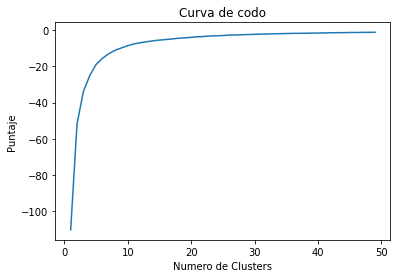

In [31]:
Nc = range(1, 50)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(pca).score(pca) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Numero de Clusters')
plt.ylabel('Puntaje')
plt.title('Curva de codo')
plt.show()

In [32]:
len(pca)

1541

In [33]:
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
kmeans.fit(pca)

KMeans(n_clusters=10)

In [34]:
A5["GroupPCA"]=kmeans.labels_

In [35]:
A5.loc['GUACARI VALLE DEL CAUCA']

MERCANCIA
ABONOS DE ORIGEN ANIMAL O VEGETAL;  INCLUSO MEZCLADOS ENTRE SI O TRATADOS QUIM   11947.92
ABONOS MINERALES O QUIMICOS FOSFATADOS                                           15333.33
ABONOS MINERALES O QUIMICOS NITROGENADOS                                          9666.67
ABONOS MINERALES O QUIMICOS;  CON DOS O TRES DE LOS ELEMENTOS FERTILIZANTES NI   17851.72
ACEITE DE PALMA Y SUS FRACCIONES;  INCLUSO REFINADO;  PERO SIN MODIFICAR QUIMI   35000.00
                                                                                   ...   
TRIGO Y MORCAJO O TRANQUILLON                                                     9800.00
TUBOS Y ACCESORIOS DE TUBERIA (POR EJEMPLO JUNTAS;  CODOS O RACORES);  DE PLAS   20000.00
YESO NATURAL; ANHIDRITA; YESOS CALCINADOS;  INCLUSO COLOREADOS O CON PEQUE?AS        0.00
[CERMETS]Y SUS MANUFACTURAS ;  INCLUIDOS LOS DESPERDICIOS Y DESECHOS              9000.00
GroupPCA                                                                             4.00


In [36]:
A5[A5["GroupPCA"]==3.0]

MERCANCIA,ABONOS DE ORIGEN ANIMAL O VEGETAL; INCLUSO MEZCLADOS ENTRE SI O TRATADOS QUIM,ABONOS MINERALES O QUIMICOS FOSFATADOS,ABONOS MINERALES O QUIMICOS NITROGENADOS,ABONOS MINERALES O QUIMICOS; CON DOS O TRES DE LOS ELEMENTOS FERTILIZANTES NI,ACEITE DE PALMA Y SUS FRACCIONES; INCLUSO REFINADO; PERO SIN MODIFICAR QUIMI,ACEITES CRUDOS DE PETROLEO O DE MINERALES BITUMINOSOS,ADOQUINES; ENCINTADO ( BORDILLOS ) Y LOSAS PARA PAVIMENTOS; DE PIEDRA NATURA,AGUA; INCLUIDA EL AGUA MINERAL NATURAL O ARTIFICIAL Y LA GASIFICADA; SIN AZU,AGUA; INCLUIDA EL AGUA MINERAL Y LA GASIFICADA; AZUCARADA; EDULCORADA DE OT,ALFORFON; MIJO Y ALPISTE; LOS DEMAS CEREALES,...,SALVADOS; MOYUELOS Y DEMAS RESIDUOS DEL CERNIDO; DE LA MOLIENDA O DE OTROS T,SEMILLAS; FRUTOS Y ESPORAS; PARA SIEMBRA,SILICATOS; SILICATOS COMERCIALES DE LOS METALES ALCALINOS,TORTAS Y DEMAS RESIDUOS SOLIDOS DE LA EXTRACCION DEL ACEITE DE SOJA; INCLUSO,TRACTORES (EXCEPTO LAS CARRETILLAS TRACTOR DE LA PARTIDA 8709),TRIGO Y MORCAJO O TRANQUILLON,TUBOS Y ACCESORIOS DE TUBERIA (POR EJEMPLO JUNTAS; CODOS O RACORES); DE PLAS,YESO NATURAL; ANHIDRITA; YESOS CALCINADOS; INCLUSO COLOREADOS O CON PEQUE?AS,[CERMETS]Y SUS MANUFACTURAS ; INCLUIDOS LOS DESPERDICIOS Y DESECHOS,GroupPCA
MUNICIPIOORIGEN,,,,,,,,,,,,,,,,,,,,,
AGUAZUL CASANARE,46000.00,0.00,34500.00,25058.33,31582.50,144714.92,0.00,63368.46,23504.05,37615.38,...,0.00,33750.00,0.00,34000.00,20028.57,0.00,26398.33,0.00,0.00,3
ANAPOIMA CUNDINAMARCA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,65200.00,0.00,0.00,0.00,0.00,3
ARIGUANI MAGDALENA,0.00,0.00,0.00,0.00,0.00,56695.98,0.00,23393.33,0.00,0.00,...,0.00,0.00,0.00,0.00,27662.55,0.00,0.00,0.00,0.00,3
ARJONA BOLIVAR,0.00,0.00,0.00,0.00,9625.00,0.00,0.00,49000.00,0.00,0.00,...,0.00,0.00,0.00,0.00,6875.00,0.00,93333.33,0.00,0.00,3
BARBOSA SANTANDER,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,54500.00,0.00,...,0.00,0.00,0.00,0.00,16833.33,17000.00,15000.00,0.00,0.00,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VALLE DEL GUAMUEZ PUTUMAYO,22500.00,0.00,0.00,9000.00,0.00,149708.38,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,12000.00,0.00,47142.86,0.00,0.00,3
VILLA RICA CAUCA,0.00,35000.00,0.00,6500.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,21875.00,0.00,9250.00,0.00,0.00,3
VILLAGARZON PUTUMAYO,0.00,0.00,0.00,0.00,0.00,97476.05,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,20750.00,0.00,36363.64,0.00,0.00,3


La competencia mas cercana a nivel de lo que produce Guacari son,YUMBO VALLE DEL CAUCA	, SANTA MARTA MAGDALENA	, PALMIRA VALLE DEL CAUCA,GUADALAJARA DE BUGA VALLE DEL CAUCA,CARTAGENA BOLIVAR,CALI VALLE DEL CAUCA, BARRANQUILLA ATLANTICO

In [37]:
A6=A5[A5["GroupPCA"]==3.0]
A7=A6/A6.loc['GUACARI VALLE DEL CAUCA']
A7

KeyError: 'GUACARI VALLE DEL CAUCA'

pandas.options.display.max_columns= None
A7.describe()[:]

Sectores interesantes:
    Con respecto a nuestra competencia:
    ALGODON CARDADO O PEINADO
   APARATOS ELECTRICOS DE TELEFONIA O TELEGRAFIA CON HILOS; INCLUIDOS LOS TELEFO
AZUCAR DE CA?A O DE REMOLACHA Y SACAROSA QUIMICAMENTE PURA; EN ESTADO SOLIDO
CAJAS DE FUNDICION; PLACAS DE FONDO PARA MOLDES; MODELOS PARA MOLDES; MOLDES P
CASCOS PARA SOMBREROS; TRENZADOS O FABRICADOS POR UNION DE TIRAS DE CUALQUIE
CIGARROS O PUROS (INCLUSO DESPUNTADOS); PURITOS Y CIGARRILLOS; DE TABACO O D
CRUSTACEOS; INCLUSO PELADOS; VIVOS; FRESCOS; REFRIGERADOS; CONGELADOS; SECOS;
CUADROS; PANELES; ARMARIOS Y DEMAS SOPORTES EQUIPADOS CON VARIOS APARATOS D
GALLOS; GALLINAS; PATOS; GANSOS; PAVOS Y PINTADAS DE LAS ESPECIES DOMESTICAS
HARINA; SEMOLA Y POLVO DE LAS LEGUMBRES SECAS DE LA PARTIDA 0713; DE SAGU O
HARINA DE CEREALES; EXCEPTO DE TRIGO O DE MORCAJO O TRANQUILLON
LAS DEMAS ARCILLAS (CON EXCLUSION DE LAS ARCILLAS DILATADAS DE LA PARTIDA 6806
LOS DEMAS TABACOS Y SUCEDANEOS DEL TABACO; ELABORADOS; TABACO HOMOGENEIZADO
  MARGARINA; MEZCLAS O PREPARACIONES ALIMENTICIAS DE GRASAS O DE ACEITES; ANIMA	
  MARMOL; TRAVERTINOS; ECAUSSINES Y DEMAS PIEDRASCALIZAS DE TALLA O DE 
LAS DEMAS ARMAS (POR EJEMPLO ARMAS LARGAS Y PISTOLAS DE MUELLE; (RESORTES);	LAS DEMAS MANUFACTURAS DE HIERRO O DE 
    APARATOS ELECTRICOS DE SE?ALIZACION ACUSTICA O VISUAL (POR EJEMPLO SONERIAS;
    APARATOS ELECTRICOS DE SE?ALIZACION (EXCEPTO LOS DE TRANSMISION DE MENSAJES)
    APARATOS E INSTRUMENTOS PARA PESAR; INCLUIDAS LAS BASCULAS Y BALANZAS PARA L
    ACEITE DE PALMA Y SUS FRACCIONES; INCLUSO REFINADO; PERO SIN MODIFICAR QUIMI
    TUBOS Y ACCESORIOS DE TUBERIA (POR EJEMPLO JUNTAS; CODOS O RACORES); DE PLAS